# 웹 크롤러란?
- 우리가 어떤 정보를 브라우저에서만 보는 것뿐 아니라 그 정보들을 내가 이용하기 편한 방식(ex: json)으로 로컬에 저장하고 싶을 때가 있따.
- HTTrack의 경우에는 웹을 그대로 자신의 컴퓨터로 복사를 해오지만, 내가 원하는 방식으로의 가공까지는 제공해주지 않는다.
- Python을 이용하면 간단한 코드 몇 줄만으로도 쉽게 웹사이트에서 원하는 정보만을 가져올 수 있다.

## 웹에서 정보 가져오기

### Requests
- Python에는 `requests`라는 유명한 http request 라이브러리가 있다.

#### 설치하기

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


#### 이용방법

In [3]:
import requests

## HTTP Get Request
req = requests.get('https://beomi.github.io/beomi.github.io_old/')

## HTML 소스 가져오기
html = req.text
## HTTP Header 가져오기
header = req.headers
## HTTP Status 가져오기 ( 200 : 정상 )
status = req.status_code
## HTTP가 정상적으로 되었는지 (True / False)
is_ok = req.ok

- HTML 소스를 이용할 것이므로 html = req.text를 이용한다

### BeautifulSoup

- Requests는 좋은 라이브러리지만 html을 '의미있는', 즉, Python이 이해하는 객체 구조로 만들어주지는 못한다. 위에서 req.text는 python의 문자열(str)객체를 반환할 뿐이므로 정보를 추출하기가 어렵다.
- 따라서 `BeautifulSoup`를 이용하게 된다. 이 BeautifulSoup는 html 코드를 Python이 이해하는 객체 구조로 변환하는 Parsing을 맡고 있고, 이 라이브러리를 이용해 우리는 제대로 된 '의미있는' 정보를 추출해낼 수 있다.

#### 설치하기

In [4]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.  Building wheel for bs4 (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1279 sha256=e210e584aa12be66918936ee6a397038e78690a863a7aec3ac65d3db4c3c297b
  Stored in directory: c:\users\82104\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4



#### 이용방법
- 위에서 이용한 parser.py 파일을 좀 더 다듬어 보자.

In [5]:
import requests
from bs4 import BeautifulSoup

## HTTP Get Request
req = requests.get('https://beomi.github.io/beomi.github.io_old/')
## HTML 소스 가져오기
html = req.text
## BeautifulSoup로 html 소스를 Python 객체로 변환하기
## 첫 번째 인자는 html 소스코드, 두 번째 인자는 어떤 parser를 이용할지 명시
## 이 글에서는 Python 내징 html.parser를 이용했다.
soup = BeautifulSoup(html, 'html.parser')

이제 `soup` 객체에서 원하는 정보를 찾아낼 수 있다.

- BeautifulSoup에서는 여러 가지 기능을 제공하는데, 여기서는 `select`를 이용한다. 
    - `select`는 CSS Selector를 이용하여 조건과 일치하는 모든 객체들을 List로 반환해준다.

- 예시로 이 블로그의 모든 제목을 가져와보자.('https://beomi.github.io/beomi.github.io_old/')

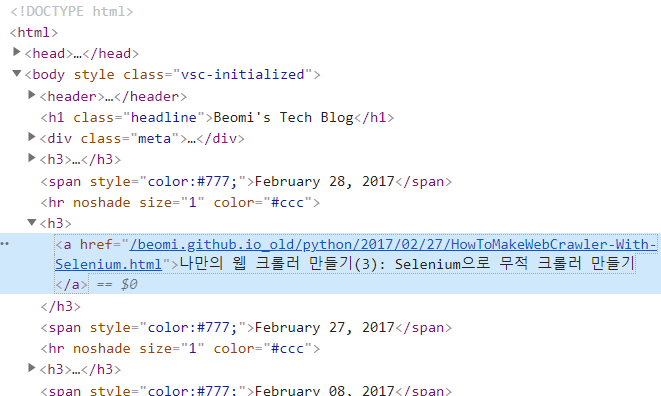

- 크롬에 내장된 검사 도구를 이용해보면 현재 title은 `a 태그`로 구성되어 있다는 것을 알 수 있다. 
- 이 상황에서 모든 a 태그를 가져올 수도 있지만, 보다 정확하게 가져오기 위해 CSS Selector를 확인해보자

Copy > Copy selector를 통해 확인한 결과
- `body > h3:nth-child(7) > a ` 

이런 코드가 나왔다.

하지만 `:nth-child(7)` 등이 붙어있는 것으로 보아 현재 요소를 '정확하게' 특정하고 있기 때문에, 좀 더 유연하게 만들어주기 위해 아래와 같이 selector를 바꿔준다.

(위 코드는 단 하나의 링크만을 특정하고, 아래 코드는 CSS Selector에 일치하는 모든 요소를 가리킨다)

- `h3 > a`

다시 코드를 수정해보자.

In [6]:
import requests
from bs4 import BeautifulSoup

req = requests.get('https://beomi.github.io/beomi.github.io_old/')
html = req.text
soup = BeautifulSoup(html, 'html.parser')

## CSS Selector를 통해 html 요소들을 찾아낸다.
my_titles = soup.select(
    'h3 > a'
)

- 위 코드에서 my_titles는 string의 list가 아니라 soup 객체들의 list이다. 따라서 태그의 속성들도 이용할 수 있는데, a 태그의 경우 href 속성이 대표적인 예시이다.
- soup 객체는 <태그> </태그>로 구성된 요소를 Python이 이해하는 상태로 바꾼 것이라고 볼 수 있다. 따라서 여러 가지로 조작이 가능하다.

In [12]:
import requests
from bs4 import BeautifulSoup

req = requests.get('https://beomi.github.io/beomi.github.io_old/')
html = req.text
soup = BeautifulSoup(html, 'html.parser')
my_titles = soup.select(
    'h3 > a'
)
## my_titles는 list 객체

for title in my_titles:
    # Tag안의 텍스트
    print(title.text)
    ## Tag의 속성을 가져오기(ex: href 속성)
    print(title.get('href'))

나만의 웹 크롤러 만들기(4): Django로 크롤링한 데이터 저장하기
/beomi.github.io_old/python/2017/02/28/HowToMakeWebCrawler-Save-with-Django.html
나만의 웹 크롤러 만들기(3): Selenium으로 무적 크롤러 만들기
/beomi.github.io_old/python/2017/02/27/HowToMakeWebCrawler-With-Selenium.html
Django에 Social Login 붙이기: Django세팅부터 Facebook/Google 개발 설정까지
/beomi.github.io_old/python/2017/02/08/Setup-SocialAuth-for-Django.html
Django에 Custom인증 붙이기
/beomi.github.io_old/python/2017/02/01/Django-CustomAuth.html
나만의 웹 크롤러 만들기(2): Login with Session
/beomi.github.io_old/python/2017/01/20/HowToMakeWebCrawler-With-Login.html
나만의 웹 크롤러 만들기 with Requests/BeautifulSoup
/beomi.github.io_old/python/2017/01/19/HowToMakeWebCrawler.html
Celery로 TelegramBot 알림 보내기
/beomi.github.io_old/2016/12/27/TelegramBot-with-Celery.html
Virtualenv/VirtualenvWrapper OS별 설치&이용법
/beomi.github.io_old/2016/12/27/HowToSetup-Virtualenv-VirtualenvWrapper.html
[DjangoTDDStudy] #02: UnitTest 이용해 기능 테스트 하기
/beomi.github.io_old/djangotddstudy/2016/12/26/Django-TDD-Study-02-Using-Unit

위와 같이 코드를 처리할 경우 
- a 태그 안의 텍스트와
- a 태그의 href 속성의 값을 가져오게 된다.

위 코드에서 title 객체는 python의 dictionary와 같이 태그의 속성을 저장한다.

따라서 `title.get('속성 이름')`이나 `title['속성 이름']`처럼 이용할 수 있다.

## 정리 예제
- 아래 코드는 크롤링한 데이터를 Python 파일과 같은 위치에 `result.json`을 만들어 저장하는 예제이다.

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import os

## Python 파일의 위치
BASE_DIR = os.path.dirname(os.path.abspath(__file__))

req = requests.get('https://beomi.github.io/beomi.github.io_old/')
html = req.text
soup = BeautifulSoup(html, 'html.parser')
my_titles = soup.select(
    'h3 > a'
)

data = {}

for title in my_titles:
    data[title.text] = title.get('href')

with open(os.path.join(BASE_DIR, 'result.json'), 'w+') as json_file:
    json.dump(data, json_file)